# Resnet Implementation on Face Recognition Dataset (LFW)

The dataset is taken from this link http://vis-www.cs.umass.edu/lfw/lfw.tgz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [3]:
physical_devices = tf.config.experimental.list_physical_devices()
physical_devices

2021-11-22 06:05:04.576864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 06:05:04.683830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 06:05:04.684613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.experimental.set_memory_growth(physical_devices[1], True)

## Extracting the zip file

In [5]:
import urllib.request
urllib.request.urlretrieve(' http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz', 'lfw-deepfunneled.tgz')

('lfw-deepfunneled.tgz', <http.client.HTTPMessage at 0x7f360288a7d0>)

In [6]:
import tarfile

file = tarfile.open('./lfw-deepfunneled.tgz', 'r')
file.extractall('.')
file.close()

In [7]:
import os

base_dir = './lfw-deepfunneled' #'/content/lfw'
class_names = os.listdir(base_dir)
print(len(class_names))

5749


## Images

In [8]:
images_dict = {}
image_path = []
for i in range(len(class_names)):
    images_folder = os.listdir(os.path.join(base_dir, class_names[i]))
    for image in images_folder:
        image_path.append(os.path.join(base_dir, class_names[i])+'/'+str(image))
        images_dict[image] = class_names[i]

In [9]:
image_path[:5]

['./lfw-deepfunneled/Dorothy_Loudon/Dorothy_Loudon_0001.jpg',
 './lfw-deepfunneled/Elizabeth_Shue/Elizabeth_Shue_0002.jpg',
 './lfw-deepfunneled/Elizabeth_Shue/Elizabeth_Shue_0001.jpg',
 './lfw-deepfunneled/Tippi_Hedren/Tippi_Hedren_0002.jpg',
 './lfw-deepfunneled/Tippi_Hedren/Tippi_Hedren_0001.jpg']

In [10]:
col_names = ['Image', 'Label']
images_data_frame = pd.DataFrame.from_dict(images_dict, orient='index').reset_index()
images_data_frame.set_axis(col_names, axis=1, inplace=True)
images_data_frame.insert(1, "Image_path", image_path) # Adding the column Image path at position 2.
images_data_frame

,Image,Image_path,Label
0,Dorothy_Loudon_0001.jpg,./lfw-deepfunneled/Dorothy_Loudon/Dorothy_Loud...,Dorothy_Loudon
1,Elizabeth_Shue_0002.jpg,./lfw-deepfunneled/Elizabeth_Shue/Elizabeth_Sh...,Elizabeth_Shue
2,Elizabeth_Shue_0001.jpg,./lfw-deepfunneled/Elizabeth_Shue/Elizabeth_Sh...,Elizabeth_Shue
3,Tippi_Hedren_0002.jpg,./lfw-deepfunneled/Tippi_Hedren/Tippi_Hedren_0...,Tippi_Hedren
4,Tippi_Hedren_0001.jpg,./lfw-deepfunneled/Tippi_Hedren/Tippi_Hedren_0...,Tippi_Hedren
...,...,...,...
13228,Charles_Taylor_0008.jpg,./lfw-deepfunneled/Charles_Taylor/Charles_Tayl...,Charles_Taylor
13229,Charles_Taylor_0009.jpg,./lfw-deepfunneled/Charles_Taylor/Charles_Tayl...,Charles_Taylor
13230,Hassanal_Bolkiah_0001.jpg,./lfw-deepfunneled/Hassanal_Bolkiah/Hassanal_B...,Hassanal_Bolkiah
13231,Eric_Benet_0001.jpg,./lfw-deepfunneled/Eric_Benet/Eric_Benet_0001.jpg,Eric_Benet


Text(0.5, 0.91, 'Ray_Young')

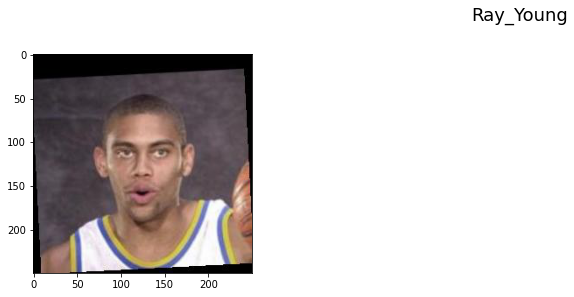

In [11]:
image_dir_index = 4200 #Index of the image directory.
images = os.listdir(os.path.join(base_dir, class_names[image_dir_index]))
num_images = len(images)
plt.figure(figsize=(18, 4*(num_images/3 + 1)))
for i in range(len(images)):
    plt.subplot(int(num_images/4) + 1, 4, i+1)
    im = plt.imread(os.path.join(base_dir, class_names[image_dir_index])+'/'+str(images[i]))
#     plt.title(class_names[image_index])
    plt.imshow(im)
plt.suptitle(class_names[image_dir_index], size=18, y=0.91)

## Considering persons with greater than 50 images

In [12]:
images_data_frame.Label.value_counts()[images_data_frame.Label.value_counts() > 25]

George_W_Bush                530
Colin_Powell                 236
Tony_Blair                   144
Donald_Rumsfeld              121
Gerhard_Schroeder            109
Ariel_Sharon                  77
Hugo_Chavez                   71
Junichiro_Koizumi             60
Jean_Chretien                 55
John_Ashcroft                 53
Jacques_Chirac                52
Serena_Williams               52
Vladimir_Putin                49
Luiz_Inacio_Lula_da_Silva     48
Gloria_Macapagal_Arroyo       44
Arnold_Schwarzenegger         42
Jennifer_Capriati             42
Laura_Bush                    41
Lleyton_Hewitt                41
Hans_Blix                     39
Alejandro_Toledo              39
Nestor_Kirchner               37
Andre_Agassi                  36
Alvaro_Uribe                  35
Megawati_Sukarnoputri         33
Silvio_Berlusconi             33
Tom_Ridge                     33
Kofi_Annan                    32
Vicente_Fox                   32
Roh_Moo-hyun                  32
David_Beck

In [13]:
persons_with_multiple_images = images_data_frame.Label.value_counts()[images_data_frame.Label.value_counts() > 25].index
len(persons_with_multiple_images)

41

In [14]:
import shutil
new_dir = './new'
try:
    shutil.rmtree(new_dir)
    print(f"The directory {new_dir} removed successfully")
except:
    print(f"The directory {new_dir} is not present")

try:
    os.mkdir(new_dir)
    os.mkdir(new_dir + "/train")
    os.mkdir(new_dir + "/val")
    os.mkdir(new_dir + "/test")
    print(f"The directory {new_dir} created successfully")
except OSError as error:
    print(f"Error - The directory {new_dir} is not created")

The directory ./new is not present
The directory ./new created successfully


In [15]:
number_of_images = {}
for item in persons_with_multiple_images:
    source = os.path.join(base_dir, item)
    train_destination = os.path.join(new_dir + "/train", item)
    val_destination = os.path.join(new_dir + "/val", item)
    test_destination = os.path.join(new_dir + "/test", item)
    try:
        os.mkdir(train_destination)
        os.mkdir(val_destination)
        os.mkdir(test_destination)
    except OSError as error: 
        pass
    i=0
    for image_item in os.listdir(source):
        source_image = os.path.join(source, image_item)
        if i<20:
            shutil.copy(source_image, train_destination)
        elif i<25:
            shutil.copy(source_image, val_destination)
        else:
            shutil.copy(source_image, test_destination)
        i += 1
        number_of_images[item] = [len(os.listdir(train_destination)), len(os.listdir(val_destination)), len(os.listdir(test_destination))]
    # print(image_item, source_image)

In [16]:
col_names = ['Person', 'Train Images', 'Validation Images', 'Test Images']
df = pd.DataFrame.from_dict(number_of_images, orient='index').reset_index()
df.set_axis(col_names, axis=1, inplace=True)
df

,Person,Train Images,Validation Images,Test Images
0,George_W_Bush,20,5,505
1,Colin_Powell,20,5,211
2,Tony_Blair,20,5,119
3,Donald_Rumsfeld,20,5,96
4,Gerhard_Schroeder,20,5,84
5,Ariel_Sharon,20,5,52
6,Hugo_Chavez,20,5,46
7,Junichiro_Koizumi,20,5,35
8,Jean_Chretien,20,5,30
9,John_Ashcroft,20,5,28


### Image Data Generator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# All images will be rescaled by 1./255.
datagen = ImageDataGenerator(rescale=1./255, 
                             #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.1, # Randomly zoom image 
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             shear_range=0.1,
                             vertical_flip=False,
                             horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = datagen.flow_from_directory(new_dir + "/train",
                                              target_size = (250 ,250),
                                              batch_size = 32,
                                              class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(new_dir + "/val",
                                                       target_size = (250 ,250),
                                                       batch_size = 32,
                                                       class_mode = 'categorical')

Found 820 images belonging to 41 classes.
Found 205 images belonging to 41 classes.


## RESNET 50

In [20]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [21]:
def my_resnet(pretrained):
    # We do not want the fully-connected layer at the top of network. 
    resnet = ResNet50(include_top=False, input_shape=(250, 250, 3))

    output = resnet.layers[-1].output
    # output = keras.layers.MaxPooling2D(pool_size=(2,2))(output)
    # output = keras.layers.Flatten()(output)

    resnet = Model(resnet.input, outputs=output)

    # We freeze the weights of the model by setting trainable as "False"
    for layer in resnet.layers:
        layer.trainable = not pretrained
        
    return resnet

    # resnet.summary()

### Adding more layers(trainable layers) on top of the layers of resnet model

In [22]:
len(persons_with_multiple_images)

41

In [23]:
from keras.models import Sequential

def my_resnet_model(pretrained=False):
    model = Sequential([
            keras.layers.InputLayer(input_shape=(250, 250, 3)),
            my_resnet(pretrained),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(4*1024, (3,3), padding='valid', activation='relu'),
#             keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.BatchNormalization(),
#             keras.layers.Conv2D(4*1024, (3,3), padding='valid', activation='relu'),
#             keras.layers.MaxPooling2D(pool_size=(2,2)),
#             keras.layers.BatchNormalization(),
#             keras.layers.Conv2D(8*1024, (3,3), padding='valid', activation='relu'),
#             keras.layers.MaxPooling2D(pool_size=(2,2)),
#             keras.layers.Conv2D(1024, (3,3), padding='valid', activation='relu'),
#             keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Flatten(),
#             keras.layers.Dense(16348, activation='relu', name='dense_1'),
#             keras.layers.Dropout(0.2),
            keras.layers.Dense(4*1024, activation='relu', name='dense_1'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1024, activation='relu', name='dense_2'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(256, activation='relu', name='dense_3'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(len(persons_with_multiple_images), activation='softmax', name='dense_final')
    ])
    
    print(model.summary())
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])
    
    return model
    
def my_simple_model():
    model = Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
    model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units = 1024, activation = 'relu'))
    model.add(keras.layers.Dense(units = 128, activation = 'relu'))
    
    # as we are training on several classes, we need several classification units (one for each class). We also use a softmax activation function
    model.add(keras.layers.Dense(units = len(persons_with_multiple_images), activation = 'softmax'))
    
    print(model.summary())
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])
    
    return model

### Plots

In [24]:
def plots(history):
    plt.figure(figsize=(18,10))
    
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
    
    plt.subplot(2,1,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'test loss'], loc='upper right')

    plt.show()

## Making different Models

### 1. Simple CNN

In [ ]:
model = my_simple_model()

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data = validation_generator)

In [ ]:
plots(history)

In [ ]:
del model
tf.keras.backend.clear_session()

### 2. Resnet with pretrained weights

In [25]:
model = my_resnet_model(pretrained=True)

2021-11-21 19:55:35.137244: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-21 19:55:35.138898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 19:55:35.140001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 19:55:35.140684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8, 8, 2048)        23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 2048)        8192      
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 4096)        75501568  
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 4096)        16384     
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              603983872 
_________________________________________________________

In [26]:
history = model.fit(train_generator, epochs=100, validation_data = validation_generator)

2021-11-21 19:55:39.987780: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-21 19:55:44.775461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 26s 592ms/step - loss: 4.5902 - accuracy: 0.0280 - val_loss: 3.7126 - val_accuracy: 0.0293
Epoch 2/100
26/26 [==============================] - 14s 521ms/step - loss: 4.1590 - accuracy: 0.0354 - val_loss: 3.7038 - val_accuracy: 0.0293
Epoch 3/100
26/26 [==============================] - 13s 508ms/step - loss: 3.9825 - accuracy: 0.0439 - val_loss: 3.7035 - val_accuracy: 0.0390
Epoch 4/100
26/26 [==============================] - 13s 505ms/step - loss: 3.9297 - accuracy: 0.0524 - val_loss: 3.7067 - val_accuracy: 0.0293
Epoch 5/100
26/26 [==============================] - 14s 546ms/step - loss: 3.9042 - accuracy: 0.0439 - val_loss: 3.6920 - val_accuracy: 0.0585
Epoch 6/100
26/26 [==============================] - 13s 513ms/step - loss: 3.9004 - accuracy: 0.0476 - val_loss: 3.6943 - val_accuracy: 0.0488
Epoch 7/100
26/26 [==============================] - 14s 522ms/step - loss: 3.8055 - accuracy: 0.0549 - val_loss: 3.6907 - val_accuracy: 0.0390
Epoc

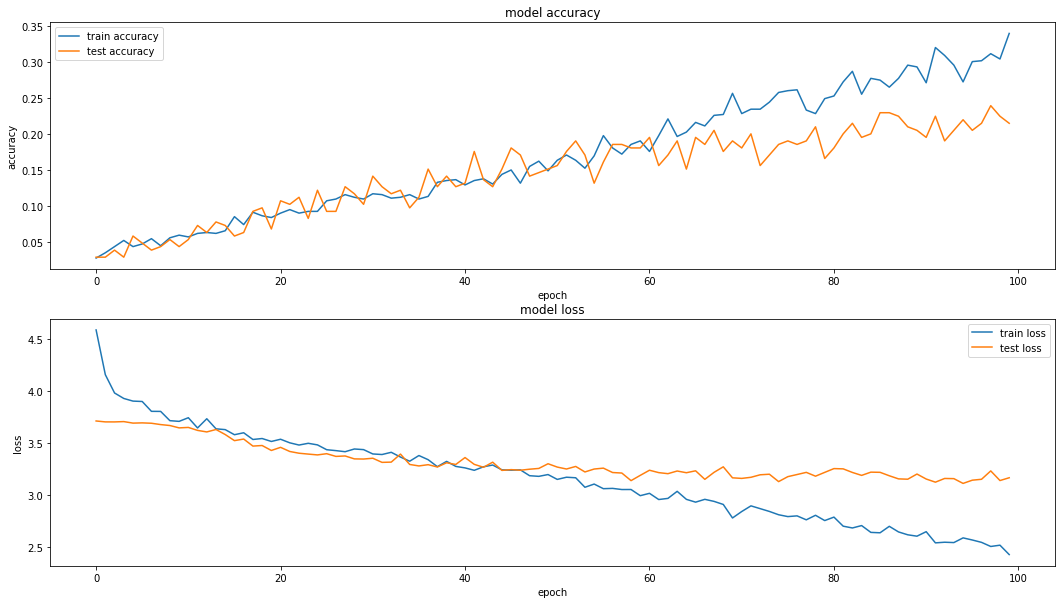

In [28]:
plots(history)

In [ ]:
del model
tf.keras.backend.clear_session()

In [ ]:
tf.keras.backend.clear_session()

### 3. Resnet without pretrained weihts

In [25]:
model = my_resnet_model(pretrained=False)

2021-11-22 06:06:15.024950: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 06:06:15.026568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 06:06:15.027401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 06:06:15.028051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8, 8, 2048)        23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 2048)        8192      
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 4096)        75501568  
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 4096)        16384     
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              603983872 
_________________________________________________________

In [26]:
history = model.fit(train_generator, epochs=100, validation_data = validation_generator)

2021-11-22 06:06:25.745210: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-22 06:06:31.841599: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 30s 673ms/step - loss: 3.9643 - accuracy: 0.0598 - val_loss: 3.9302 - val_accuracy: 0.0244
Epoch 2/100
26/26 [==============================] - 15s 565ms/step - loss: 2.8912 - accuracy: 0.2305 - val_loss: 3.8764 - val_accuracy: 0.0244
Epoch 3/100
26/26 [==============================] - 15s 576ms/step - loss: 2.0585 - accuracy: 0.4622 - val_loss: 3.8807 - val_accuracy: 0.0293
Epoch 4/100
26/26 [==============================] - 15s 557ms/step - loss: 1.5470 - accuracy: 0.5817 - val_loss: 3.9373 - val_accuracy: 0.0244
Epoch 5/100
26/26 [==============================] - 16s 582ms/step - loss: 1.0903 - accuracy: 0.6854 - val_loss: 4.0244 - val_accuracy: 0.0244
Epoch 6/100
26/26 [==============================] - 15s 558ms/step - loss: 0.7364 - accuracy: 0.8122 - val_loss: 4.1071 - val_accuracy: 0.0244
Epoch 7/100
26/26 [==============================] - 15s 589ms/step - loss: 0.5569 - accuracy: 0.8512 - val_loss: 4.2367 - val_accuracy: 0.0341
Epoc

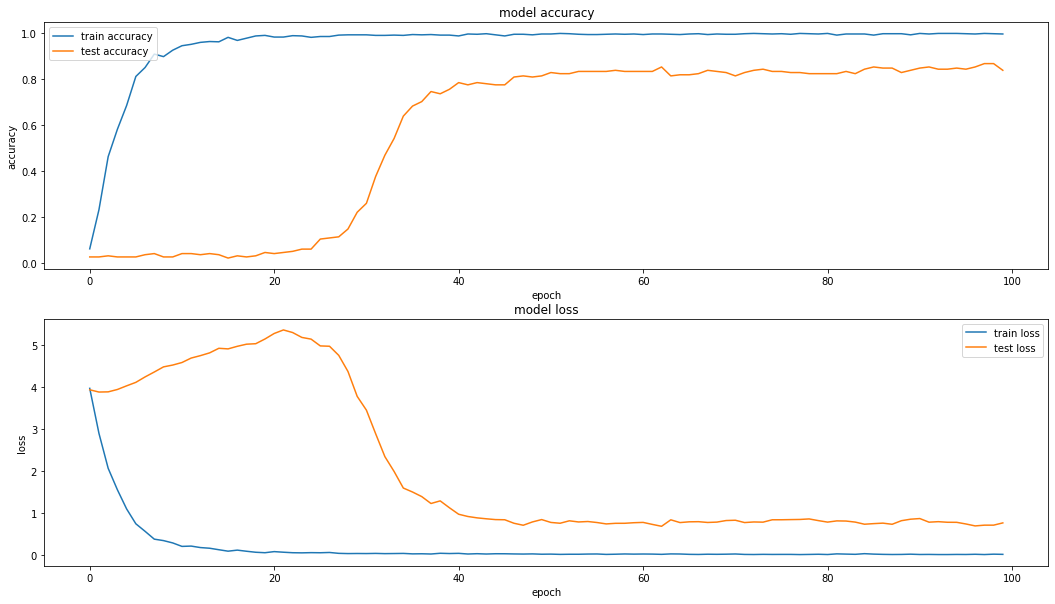

In [28]:
plots(history)

## Test on Images

In [29]:
test_directory = new_dir + "/test"
persons = os.listdir(test_directory)

persons_dict = {}
for i in range(len(persons)):
    images_folder = os.listdir(os.path.join(test_directory, persons[i]))
    for image in images_folder:
        person_image_path = os.path.join(test_directory, persons[i]+'/'+str(image))
        persons_dict[image] = [person_image_path, persons[i]]
        
col_names = ['Image', 'Image_path', 'Label']
persons_data_frame = pd.DataFrame.from_dict(persons_dict, orient='index').reset_index()
persons_data_frame.set_axis(col_names, axis=1, inplace=True)
persons_data_frame

,Image,Image_path,Label
0,Jean_Chretien_0030.jpg,./new/test/Jean_Chretien/Jean_Chretien_0030.jpg,Jean_Chretien
1,Jean_Chretien_0037.jpg,./new/test/Jean_Chretien/Jean_Chretien_0037.jpg,Jean_Chretien
2,Jean_Chretien_0041.jpg,./new/test/Jean_Chretien/Jean_Chretien_0041.jpg,Jean_Chretien
3,Jean_Chretien_0048.jpg,./new/test/Jean_Chretien/Jean_Chretien_0048.jpg,Jean_Chretien
4,Jean_Chretien_0002.jpg,./new/test/Jean_Chretien/Jean_Chretien_0002.jpg,Jean_Chretien
...,...,...,...
1533,Lleyton_Hewitt_0012.jpg,./new/test/Lleyton_Hewitt/Lleyton_Hewitt_0012.jpg,Lleyton_Hewitt
1534,Lleyton_Hewitt_0010.jpg,./new/test/Lleyton_Hewitt/Lleyton_Hewitt_0010.jpg,Lleyton_Hewitt
1535,Lleyton_Hewitt_0006.jpg,./new/test/Lleyton_Hewitt/Lleyton_Hewitt_0006.jpg,Lleyton_Hewitt
1536,Lleyton_Hewitt_0011.jpg,./new/test/Lleyton_Hewitt/Lleyton_Hewitt_0011.jpg,Lleyton_Hewitt


In [30]:
names_dict = {v:k for k, v in train_generator.class_indices.items()}
names_dict

{0: 'Alejandro_Toledo',
 1: 'Alvaro_Uribe',
 2: 'Andre_Agassi',
 3: 'Ariel_Sharon',
 4: 'Arnold_Schwarzenegger',
 5: 'Bill_Clinton',
 6: 'Colin_Powell',
 7: 'David_Beckham',
 8: 'Donald_Rumsfeld',
 9: 'George_W_Bush',
 10: 'Gerhard_Schroeder',
 11: 'Gloria_Macapagal_Arroyo',
 12: 'Gray_Davis',
 13: 'Guillermo_Coria',
 14: 'Hans_Blix',
 15: 'Hugo_Chavez',
 16: 'Jack_Straw',
 17: 'Jacques_Chirac',
 18: 'Jean_Chretien',
 19: 'Jennifer_Capriati',
 20: 'John_Ashcroft',
 21: 'John_Negroponte',
 22: 'Juan_Carlos_Ferrero',
 23: 'Junichiro_Koizumi',
 24: 'Kofi_Annan',
 25: 'Laura_Bush',
 26: 'Lleyton_Hewitt',
 27: 'Luiz_Inacio_Lula_da_Silva',
 28: 'Mahmoud_Abbas',
 29: 'Megawati_Sukarnoputri',
 30: 'Nestor_Kirchner',
 31: 'Recep_Tayyip_Erdogan',
 32: 'Ricardo_Lagos',
 33: 'Roh_Moo-hyun',
 34: 'Rudolph_Giuliani',
 35: 'Serena_Williams',
 36: 'Silvio_Berlusconi',
 37: 'Tom_Ridge',
 38: 'Tony_Blair',
 39: 'Vicente_Fox',
 40: 'Vladimir_Putin'}

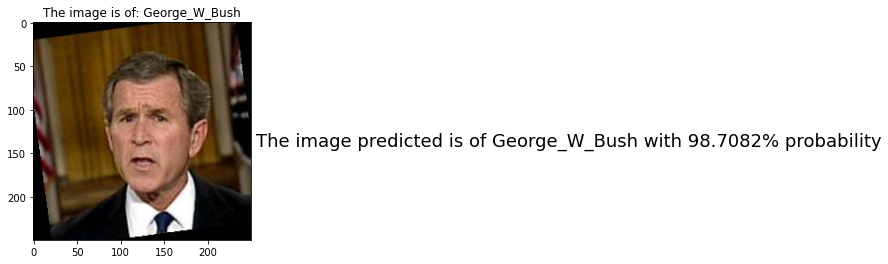

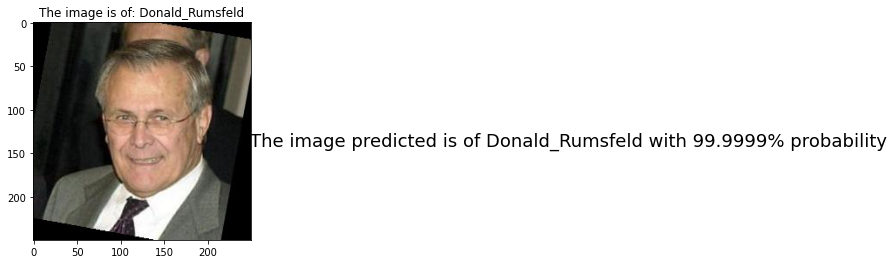

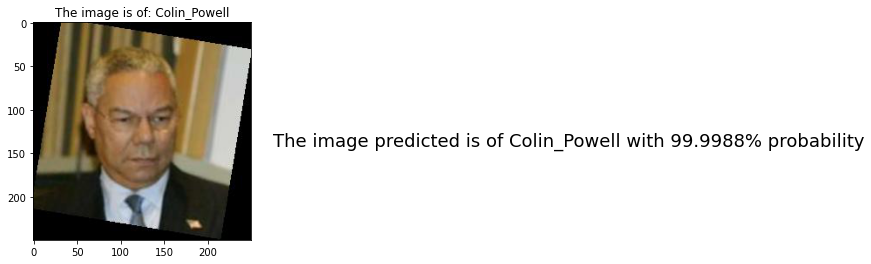

In [53]:
Image_numbers = [800, 200, 1200]

for Image_number in Image_numbers:
    plt.figure()
    im = plt.imread(persons_data_frame.Image_path[Image_number])
    input_shape = im.shape
    img = im.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    prediction = model.predict(img)
    result = names_dict[np.argmax(prediction)]
    format_float = "{:.4f}".format(np.max(prediction)*100)
    plt.title("The image is of: " + str(persons_data_frame.Label[Image_number]))
    plt.suptitle(f"The image predicted is of {result} with {format_float}% probability", size=18, y=0.5, x=1.5)
    plt.imshow(im)

In [46]:
cnt = 0
total = 0
for index, row in persons_data_frame[['Image_path', 'Label']].iterrows():
    im = plt.imread(row['Image_path'])
    input_shape = im.shape
    img = im.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    result = names_dict[np.argmax(model.predict(img))]
    if(result==row['Label']):
        cnt += 1
    total += 1
print(f"{cnt} number of images are correctly recognized out of {total} images")
print(f"The accuracy is {cnt/total}")

1335 number of images are correctly recognized out of 1538 images
The accuracy is 0.8680104031209362


In [ ]:
del model

In [ ]:
tf.keras.backend.clear_session()